In [39]:
from datetime import datetime
from dateutil import parser
import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset
from pandas_datareader import data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%config InlineBackend.figure_format = 'svg'

In [3]:
t = datetime(year = 2021, month = 10, day = 27)
print(t)

2021-10-27 00:00:00


In [4]:
date = parser.parse("27th of October, 2021")
print(date)

2021-10-27 00:00:00


In [5]:
date.strftime('%A')

'Wednesday'

In [6]:
dates = np.array(['2021-10-27', '2021-10-28'], dtype = np.datetime64)
type(dates[0])

date = np.datetime64('2021-10-28')
print(date)

2021-10-28


In [7]:
date + np.arange(7)

array(['2021-10-28', '2021-10-29', '2021-10-30', '2021-10-31',
       '2021-11-01', '2021-11-02', '2021-11-03'], dtype='datetime64[D]')

In [9]:
t = np.datetime64('2021-10-28 11:38:10.20', 'ns')
print(t)

2021-10-28T11:38:10.200000000


In [10]:
date = pd.to_datetime('27th of October, 2021')
print(date)

2021-10-27 00:00:00


In [11]:
date.strftime('%A')

'Wednesday'

In [12]:
date + pd.to_timedelta(np.arange(7))

DatetimeIndex([          '2021-10-27 00:00:00',
               '2021-10-27 00:00:00.000000001',
               '2021-10-27 00:00:00.000000002',
               '2021-10-27 00:00:00.000000003',
               '2021-10-27 00:00:00.000000004',
               '2021-10-27 00:00:00.000000005',
               '2021-10-27 00:00:00.000000006'],
              dtype='datetime64[ns]', freq=None)

In [13]:
ind = pd.DatetimeIndex(['2021-10-27', '2021-10-28', '2021-10-29'])
print(ind,'\n')

ser = pd.Series([0, 1, 2], index = ind)
print(ser, '\n')

print(ser['2021-10-28' : '2021-10-29'], '\n')
print(ser['2021-10'])

DatetimeIndex(['2021-10-27', '2021-10-28', '2021-10-29'], dtype='datetime64[ns]', freq=None) 

2021-10-27    0
2021-10-28    1
2021-10-29    2
dtype: int64 

2021-10-28    1
2021-10-29    2
dtype: int64 

2021-10-27    0
2021-10-28    1
2021-10-29    2
dtype: int64


In [14]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', 
                        '2015-Jul-6'])
print(dates)

dates.to_period('D')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06'], dtype='datetime64[ns]', freq=None)


PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06'], dtype='period[D]', freq='D')

In [15]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days'], dtype='timedelta64[ns]', freq=None)

In [16]:
pd.date_range('2021-10-27', '2021-10-31')

DatetimeIndex(['2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31'],
              dtype='datetime64[ns]', freq='D')

In [17]:
pd.date_range('2021-10-27', periods = 12, freq = 'H')

DatetimeIndex(['2021-10-27 00:00:00', '2021-10-27 01:00:00',
               '2021-10-27 02:00:00', '2021-10-27 03:00:00',
               '2021-10-27 04:00:00', '2021-10-27 05:00:00',
               '2021-10-27 06:00:00', '2021-10-27 07:00:00',
               '2021-10-27 08:00:00', '2021-10-27 09:00:00',
               '2021-10-27 10:00:00', '2021-10-27 11:00:00'],
              dtype='datetime64[ns]', freq='H')

In [18]:
pd.period_range('2021-10', periods=12, freq='M')

PeriodIndex(['2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
             '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09'],
            dtype='period[M]', freq='M')

In [19]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [21]:
pd.date_range('2021-11-01', periods = 10, freq = 'B')

DatetimeIndex(['2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
               '2021-11-05', '2021-11-08', '2021-11-09', '2021-11-10',
               '2021-11-11', '2021-11-12'],
              dtype='datetime64[ns]', freq='B')

In [25]:
pd.date_range('2021-11-01', periods = 9, freq = '2H30T')

DatetimeIndex(['2021-11-01 00:00:00', '2021-11-01 02:30:00',
               '2021-11-01 05:00:00', '2021-11-01 07:30:00',
               '2021-11-01 10:00:00', '2021-11-01 12:30:00',
               '2021-11-01 15:00:00', '2021-11-01 17:30:00',
               '2021-11-01 20:00:00'],
              dtype='datetime64[ns]', freq='150T')

In [31]:
ts = pd.Timestamp('2021-10-31 23:28:30')
ts + DateOffset(hours = 40)

Timestamp('2021-11-02 15:28:30')

In [36]:
goog = data.DataReader('GOOG', start = '2004', end = '2021', data_source = 'yahoo')

goog = goog['Close']
print(goog)

Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239197
2004-08-25      52.802086
                 ...     
2020-12-24    1738.849976
2020-12-28    1776.089966
2020-12-29    1758.719971
2020-12-30    1739.520020
2020-12-31    1751.880005
Name: Close, Length: 4122, dtype: float64


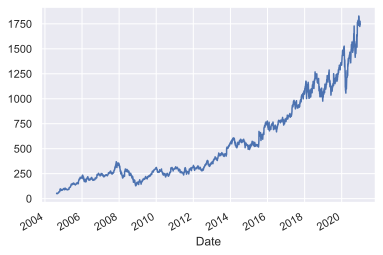

In [40]:
goog.plot();

In [43]:
goog.resample('Q').mean()
goog.resample('H').max()

Date
2004-08-19 00:00:00      49.982655
2004-08-19 01:00:00            NaN
2004-08-19 02:00:00            NaN
2004-08-19 03:00:00            NaN
2004-08-19 04:00:00            NaN
                          ...     
2020-12-30 20:00:00            NaN
2020-12-30 21:00:00            NaN
2020-12-30 22:00:00            NaN
2020-12-30 23:00:00            NaN
2020-12-31 00:00:00    1751.880005
Freq: H, Name: Close, Length: 143473, dtype: float64

<ipython-input-55-a5cccb869517>:7: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax = ax[2])


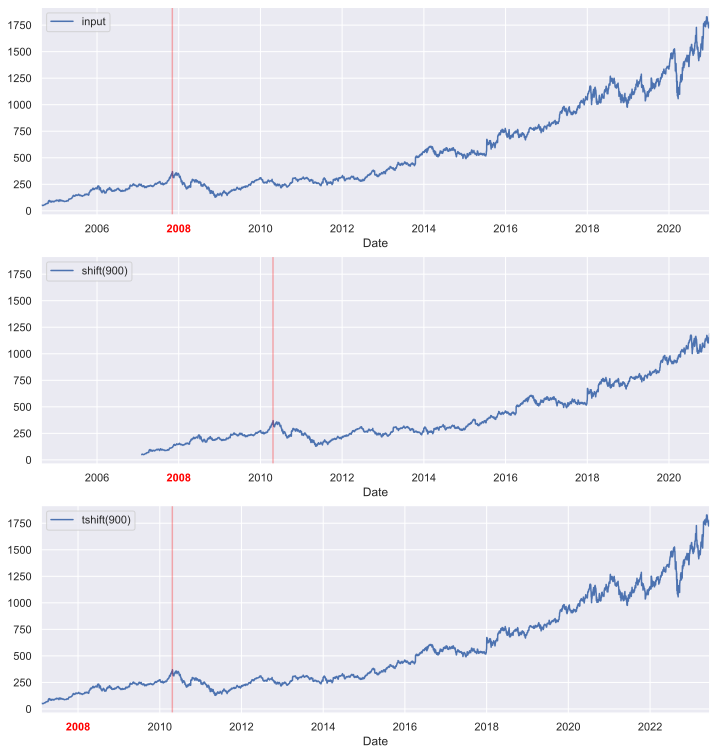

In [55]:
fig, ax = plt.subplots(3, sharey = True, figsize = (12, 13))

goog = goog.asfreq('D', method = 'pad')

goog.plot(ax = ax[0])
goog.shift(900).plot(ax = ax[1])
goog.tshift(900).plot(ax = ax[2])

local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc = 2)
ax[0].get_xticklabels()[2].set(weight = 'heavy', color = 'red')
ax[0].axvline(local_max, alpha = 0.3, color = 'red')

ax[1].legend(['shift(900)'], loc = 2)
ax[1].get_xticklabels()[2].set(weight = 'heavy', color = 'red')
ax[1].axvline(local_max + offset, alpha = 0.3, color = 'red')

ax[2].legend(['tshift(900)'], loc = 2)
ax[2].get_xticklabels()[1].set(weight = 'heavy', color = 'red')
ax[2].axvline(local_max + offset, alpha = 0.3, color = 'red')

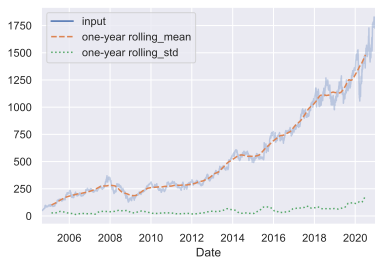

In [58]:
rolling = goog.rolling(365, center = True)

data = pd.DataFrame({'input':goog, 
                     'one-year rolling_mean' : rolling.mean(),
                     'one-year rolling_std' : rolling.std()})
ax = data.plot(style = ['-', '--', ':'])
ax.lines[0].set_alpha(0.3)